# Data description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)

# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df=pd.read_csv('wine quality.csv')

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
df.shape

(1599, 12)

We have 1599 rows and 12 columns

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the data types are numeric

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values

In [11]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

There are chances of outliers and data can be slightly skewed, however, we will check them separately

In [13]:
# Lets convert the quality of wine>=7 to 1 and below 7 to 0

df['quality'] = np.where(df['quality'] >= 7,1,0)

In [14]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [21]:
pd.set_option('display.max_rows',None)

In [22]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

<AxesSubplot:>

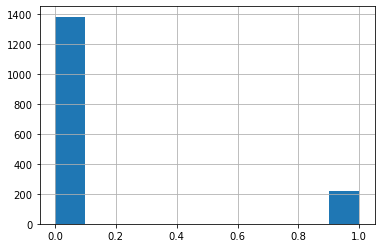

In [25]:
#checking the data balancing

df['quality'].hist(grid=True)

There is class imbalance now, we have to treat it

# Checking the outliers

In [27]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

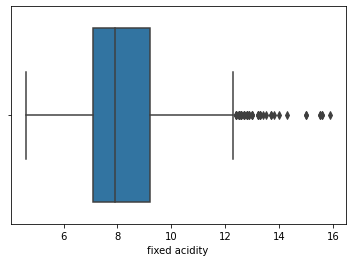

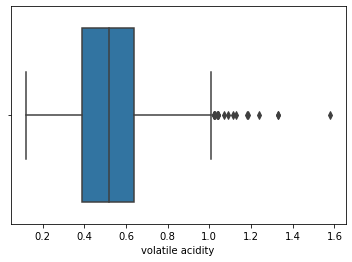

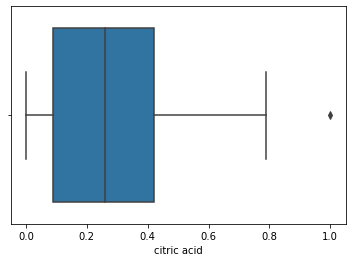

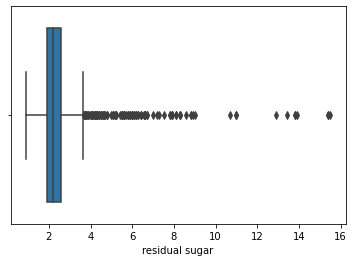

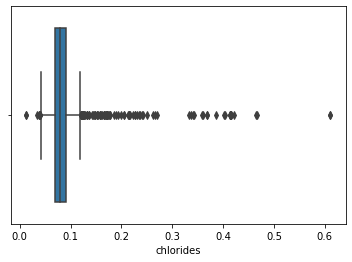

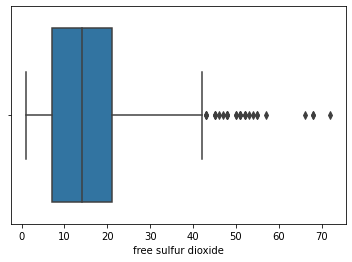

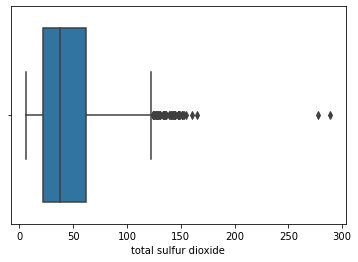

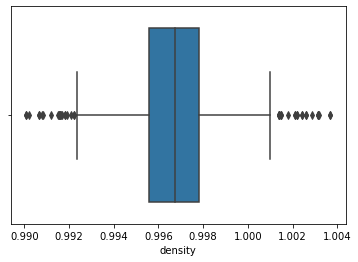

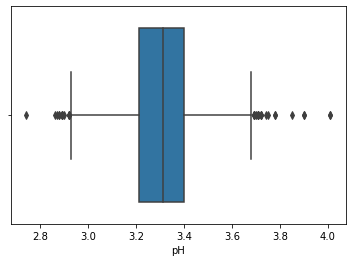

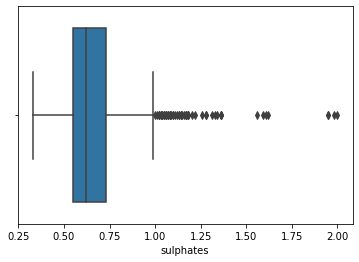

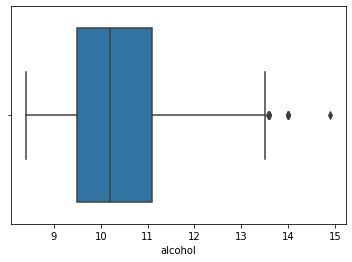

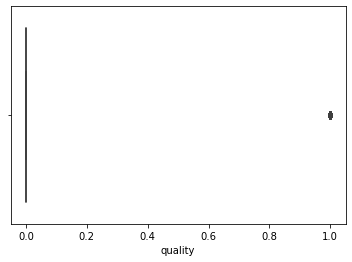

In [29]:
column=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for i in df[column]:
    sns.boxplot(df[i])
    plt.show()

We can remove the outliers through z score technique as data is not highly skewed

# Checking the data distribution

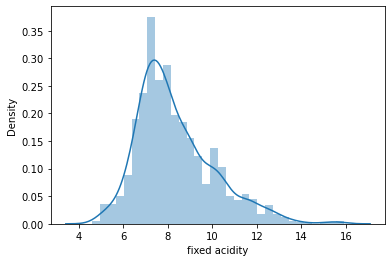

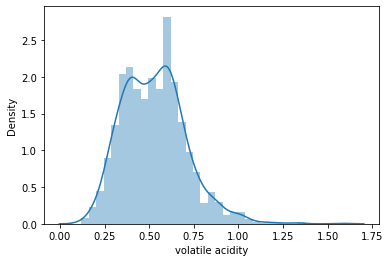

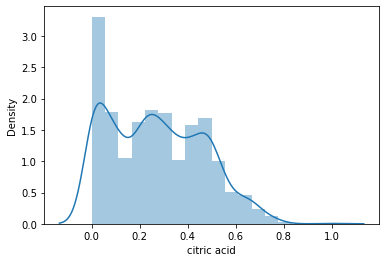

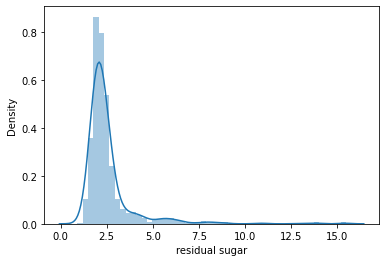

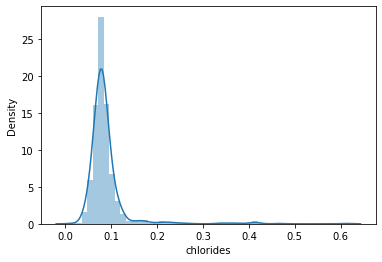

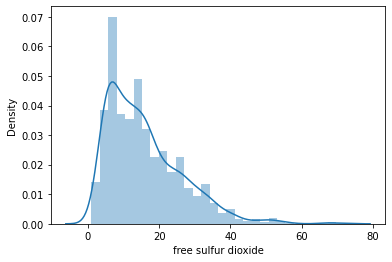

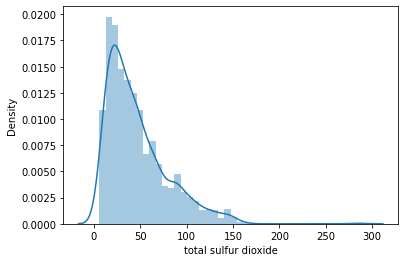

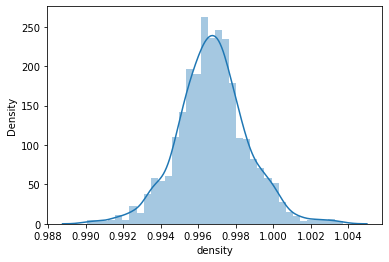

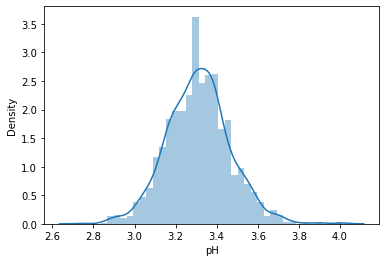

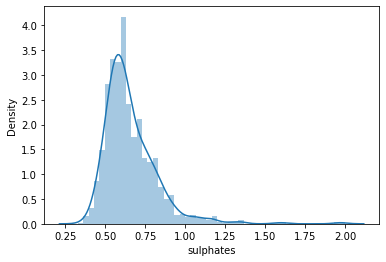

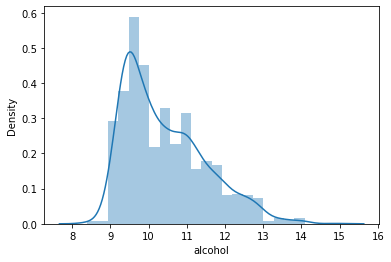

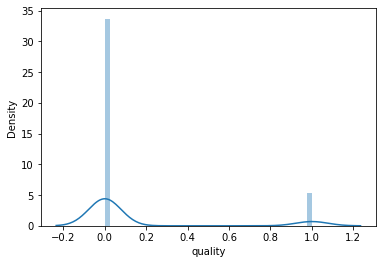

In [30]:
column=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for i in df[column]:
    sns.distplot(df[i])
    plt.show()

In [31]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

data is skewed for few variables

# Checking the correlation

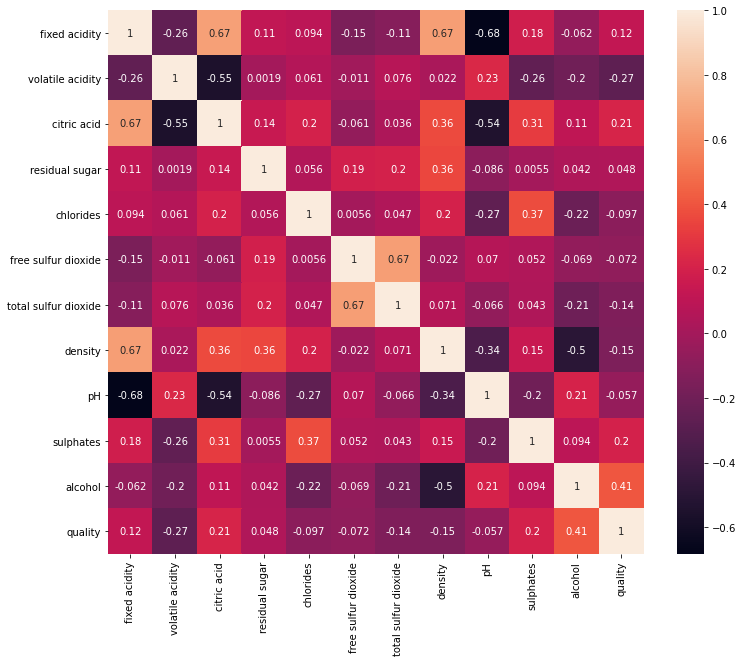

In [33]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

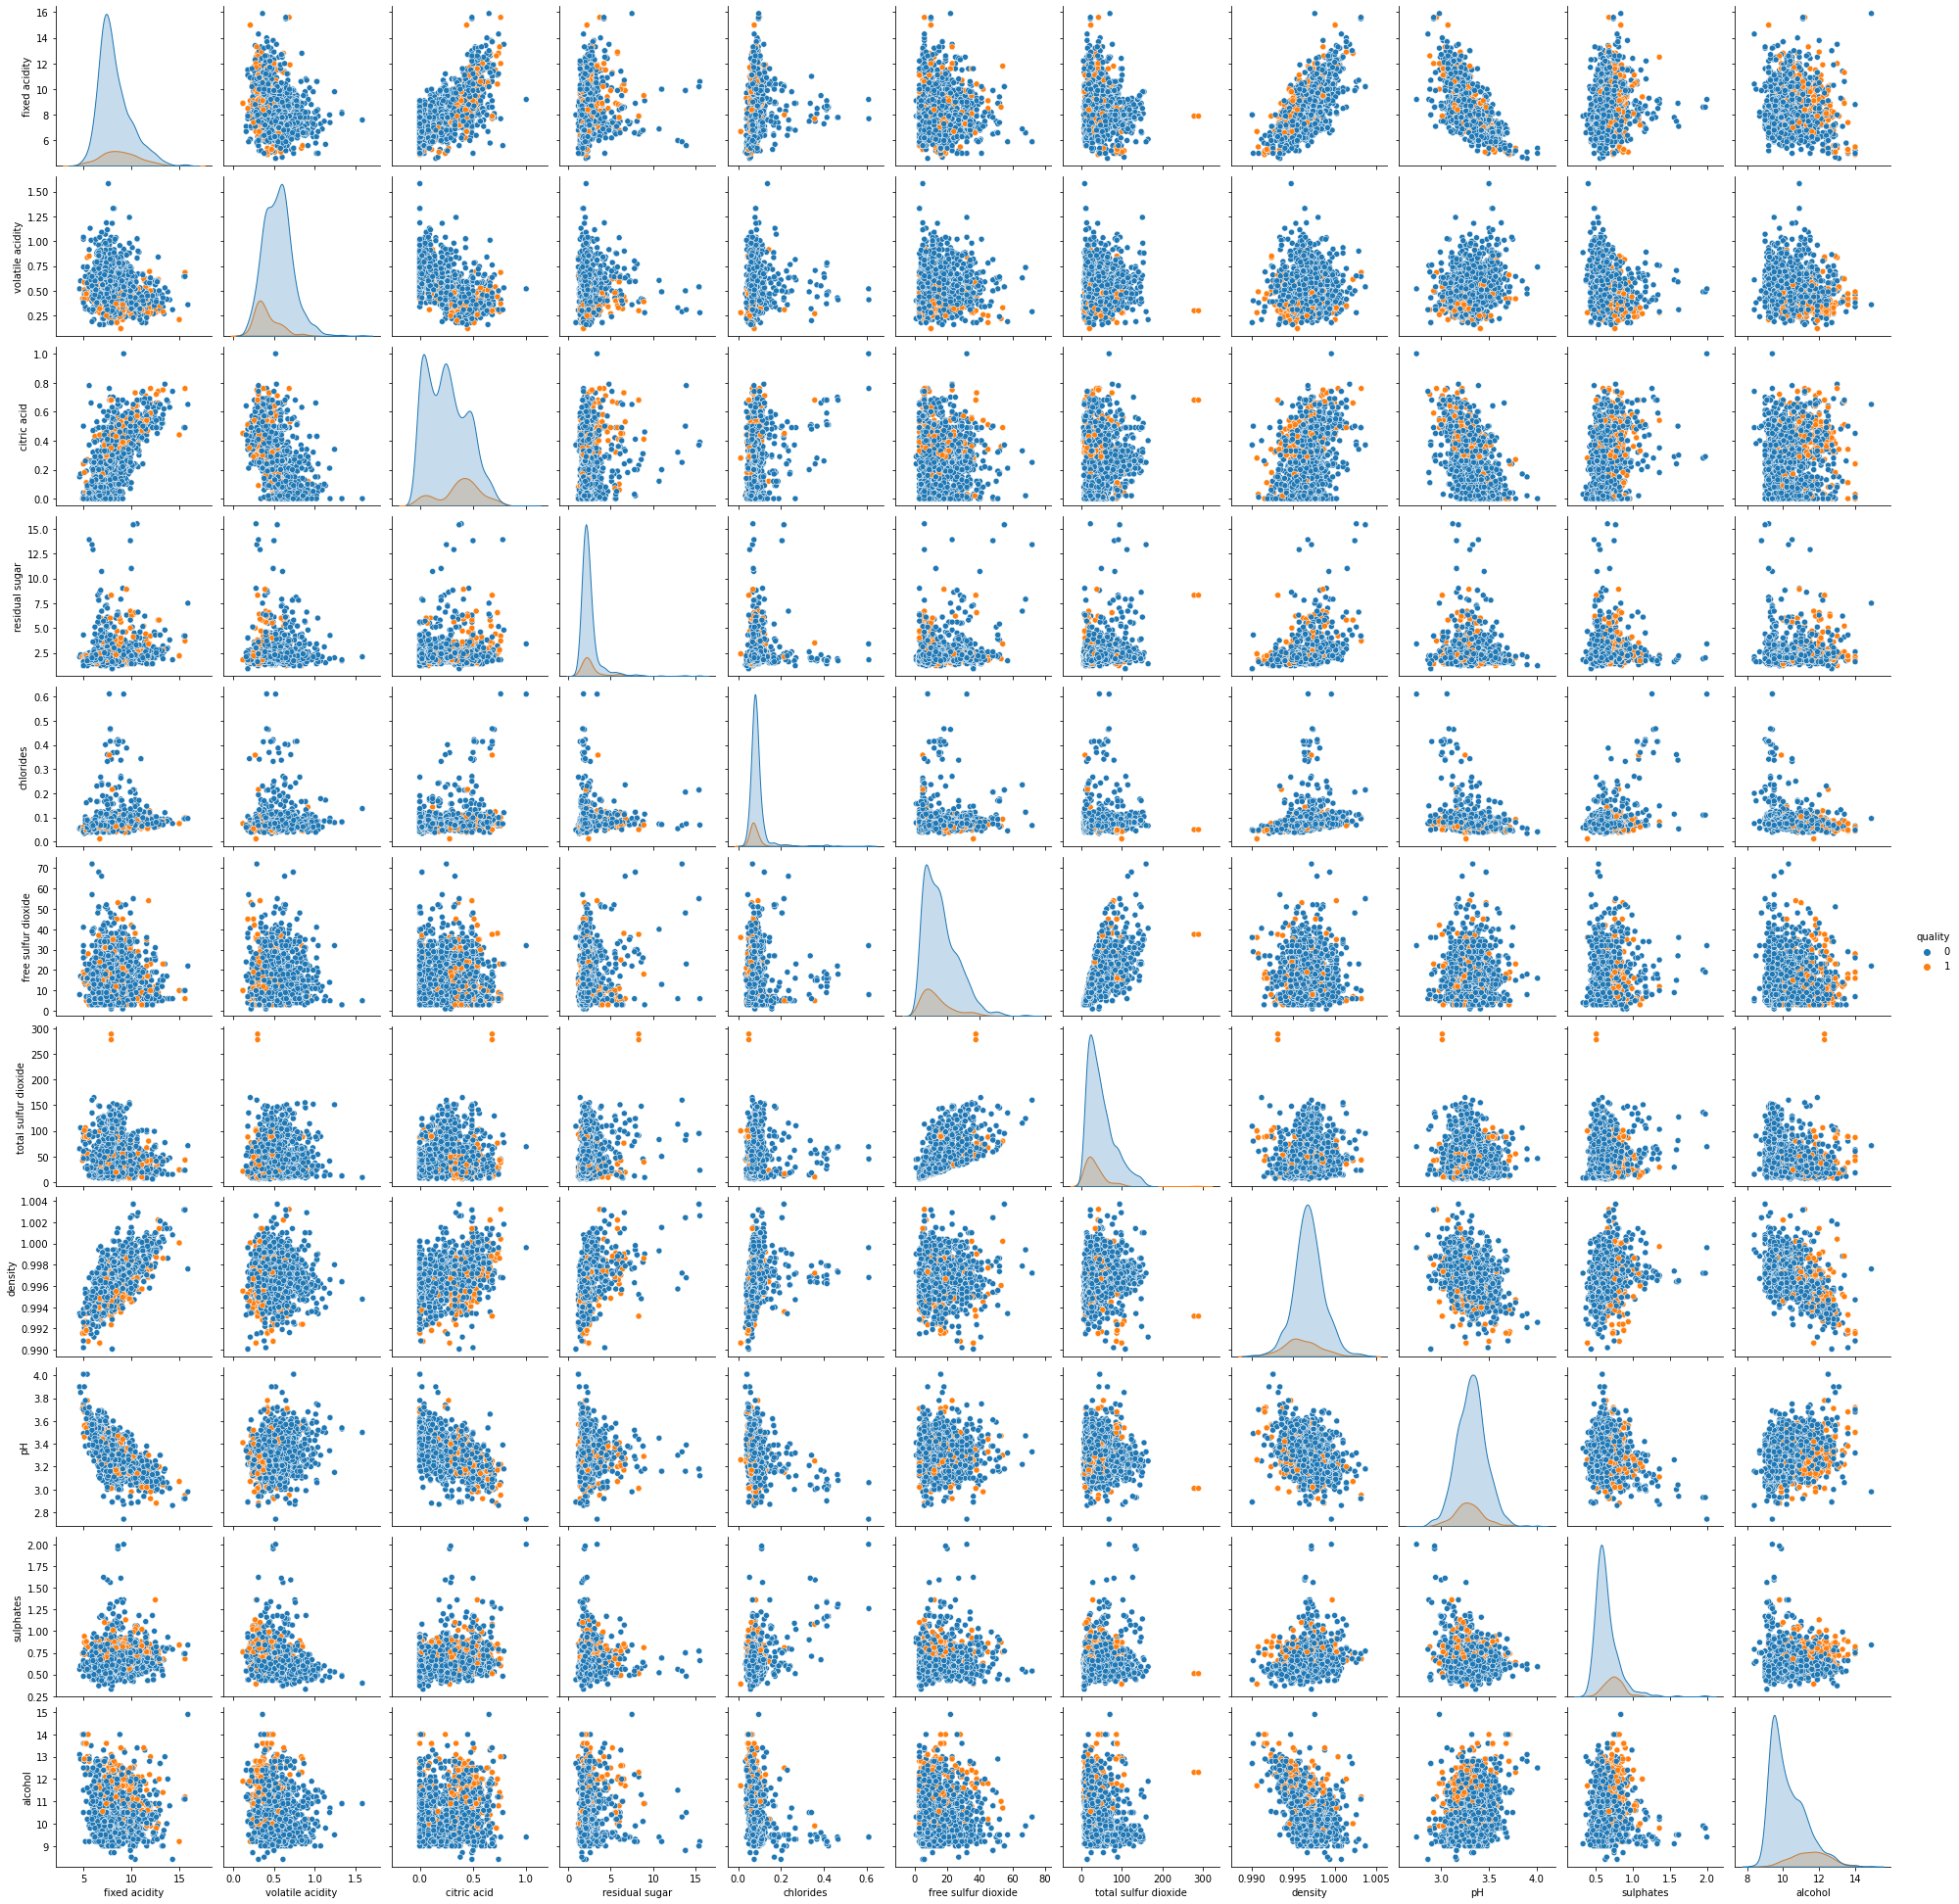

In [38]:
sns.pairplot(df, hue='quality')

# Removing the outliers

In [35]:
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(df))

In [39]:
df_new=df[(z<3).all(axis=1)]

In [40]:
print('Shape before removing the outliers:',df.shape)
print('Shape after removing the outliers:',df_new.shape)

Shape before removing the outliers: (1599, 12)
Shape after removing the outliers: (1458, 12)


Data loss is 8.8% hence, its acceptable

In [41]:
df=df_new

# Splitting the dataset

In [42]:
x=df.drop('quality',axis=1)

In [43]:
y=df['quality']

# Removing the Skewness

In [44]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [45]:
import sklearn
from sklearn.preprocessing import power_transform

In [46]:
df_x=power_transform(x)
df_x=pd.DataFrame(df_x,columns=x.columns)
df_x


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.469102          1.045775    -1.521870       -0.610050  -0.145674   
1         -0.172127          1.902404    -1.521870        0.648011   0.981105   
2         -0.172127          1.344815    -1.242790        0.207208   0.714585   
3          1.571351         -1.559116     1.441794       -0.610050  -0.207728   
4         -0.469102          1.045775    -1.521870       -0.610050  -0.145674   
5         -0.469102          0.838134    -1.521870       -0.871758  -0.207728   
6         -0.102018          0.513269    -1.108537       -1.489969  -0.603544   
7         -0.547778          0.785134    -1.521870       -3.278735  -0.891358   
8         -0.172127          0.401192    -1.380514       -0.374385  -0.335109   
9         -0.392261         -0.067654     0.572969        2.350538  -0.466992   
10        -1.062351          0.401192    -0.977605       -0.871758   0.938552   
11        -0.392261         -0.067654     0.572969        2.350538  -0.466992   
12        -2.246311          0.596056    -1.521870       -1.489969   0.570749   
13         0.287897         -1.559116     1.441794       -0.871758   0.714585   
14        -0.469102          0.457476    -0.977605        1.925526   0.419337   
15         0.521804         -2.029109     1.113033       -0.871758  -0.084686   
16        -0.317192         -0.772313     0.328911        0.207208   0.204940   
17        -0.102018         -0.507368    -0.198474       -1.489969   1.296795   
18         0.287897         -0.128705    -0.787126        0.207208   0.313981   
19        -0.882219         -0.705091    -0.603360        0.367330   0.367111   
20        -1.451955         -0.772313    -0.484379       -2.271401   0.092079   
21        -0.317192         -0.638534    -0.034352       -0.871758   0.092079   
22        -0.102018         -0.507368    -0.198474       -1.489969   1.296795   
23        -0.710906          1.096626    -1.521870       -0.610050   0.092079   
24        -0.172127          0.758466    -1.521870       -0.374385   0.204940   
25        -1.062351          0.916807    -1.042665        0.367330   0.570749   
26        -0.882219          0.968714    -1.521870        0.513760   1.259627   
27         0.163467          0.811690    -0.725146        0.207208   0.259930   
28        -2.780001         -1.262477     0.019189       -0.871758   1.183384   
29        -0.172127          0.758466    -1.521870        2.238346   0.419337   
30        -0.172127          0.513269    -0.603360        0.367330   0.419337   
31         0.033616         -0.840212     0.176459       -0.161430  -0.817509   
32        -0.547778         -0.378729     0.572969        2.316415  -0.270866   
33        -0.547778         -0.378729     0.572969        2.316415  -0.270866   
34         0.465102          0.568580     0.278613        0.885044   0.521140   
35        -0.971141          0.890692    -1.380514       -0.871758  -2.169977   
36        -0.243833          2.141692     0.895330        0.031636   1.572683   
37         0.407241         -1.483758     1.280285       -1.489969   1.540187   
38        -1.350641         -0.705091    -0.088468       -1.489969  -0.817509   
39        -2.246311         -1.335453     0.620354       -2.271401  -0.270866   
40         0.465102          0.838134     0.072164       -1.163480  -0.270866   
41        -1.155941          0.052767    -1.242790        0.031636  -0.603544   
42        -1.155941         -0.067654    -1.242790       -0.161430  -0.673624   
43         0.348185         -0.840212     0.572969        1.087011   0.148996   
44        -0.317192         -0.007166    -0.543526        0.885044   1.439368   
45        -0.243833          0.623415    -1.242790        1.655805   0.313981   
46         1.167534         -0.572630     1.481315        1.410571  -0.534673   
47        -0.172127          0.457476    -0.368089        0.207208  -0.145674   
48        -0.547778         -0.772313

In [47]:
df_x.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

Skewness has been removed from all the variables

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
dfn=sc.fit_transform(x)
dfn=pd.DataFrame(dfn,columns=x.columns)

In [50]:
x=dfn

In [51]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.554045          1.038708    -1.387413       -0.564985  -0.260755   
1      -0.311190          2.101325    -1.387413        0.244255   0.776445   
2      -0.311190          1.392914    -1.178214       -0.102562   0.493572   
3       1.753082         -1.440732     1.541370       -0.564985  -0.307900   
4      -0.554045          1.038708    -1.387413       -0.564985  -0.260755   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.439085             -0.328538  0.629873  1.374768  -0.635382   
1             1.063952              0.793739  0.047678 -0.823752   0.289771   
2            -0.009646              0.351630  0.164117 -0.398232   0.058483   
3             0.205073              0.555680  0.746312 -1.107432  -0.481190   
4            -0.439085             -0.328538  0.629873  1.374768  -0.635382   

    alcohol  
0 -0.996573  
1 -0.604915  
2 -0.604915  
3 -0.604915  
4 -0.996573

# Finding the best Random State

In [52]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print('Best Accuracy',maxaccu,'for random state',maxRS)

Best Accuracy 0.9345794392523364 for random state 108


In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
x_train_over,y_train_over=SMOTE(k_neighbors=3).fit_resample(x,y)

In [61]:
x_train_over.shape

(2514, 11)

In [62]:
y_train_over.shape

(2514,)

In [64]:
from collections import Counter

In [65]:
Counter(y)

Counter({0: 1257, 1: 201})

In [66]:
Counter(y_train_over)

Counter({0: 1257, 1: 1257})

# Since outcome has two variables,We can use Binary Classification

In [67]:
lr=LogisticRegression()
sv=SVC()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [78]:
model=[lr,sv,rfc,dtc]

for i in model:
    i.fit(x_train_over,y_train_over)
    pred=i.predict(x_test)
    print('Accuracy score of',i)
    print(accuracy_score(y_test,pred))
    print(f1_score(y_test,pred))
    print(precision_score(y_test,pred))
    print(recall_score(y_test,pred))

Accuracy score of LogisticRegression()
0.8068535825545171
0.5633802816901409
0.4166666666666667
0.8695652173913043
Accuracy score of SVC()
0.881619937694704
0.6779661016949152
0.5555555555555556
0.8695652173913043
Accuracy score of RandomForestClassifier()
1.0
1.0
1.0
1.0
Accuracy score of DecisionTreeClassifier()
1.0
1.0
1.0
1.0


In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
scr=cross_val_score(lr,x,y,cv=5)
print('Cross Validation of Logistic Regression is',scr.mean())

Cross Validation of Logistic Regression is 0.8724167961210751


In [81]:
scr=cross_val_score(sv,x,y,cv=5)
print('Cross Validation of SVC is',scr.mean())

Cross Validation of SVC is 0.8703620016005272


In [82]:
scr=cross_val_score(rfc,x,y,cv=5)
print('Cross Validation of Random Forest Classifier is',scr.mean())

Cross Validation of Random Forest Classifier is 0.8683072070799793


In [83]:
scr=cross_val_score(dtc,x,y,cv=5)
print('Cross Validation of Decision Tree Classifier is',scr.mean())

Cross Validation of Decision Tree Classifier is 0.822993456668079


Here, SVC is having least difference between accuracy score and cross validation score, hence SVC is the best model

# Hyper Parameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters={'C':[0.1,1,10,100,1000],'kernel':['poly','rbf','sigmoid']}
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_

{'C': 10, 'kernel': 'rbf'}

In [89]:
SVC_mod=SVC(C=0.1,kernel='sigmoid')
SVC_mod.fit(x_train,y_train)
pred=SVC_mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.8566978193146417


# AUC ROC Score

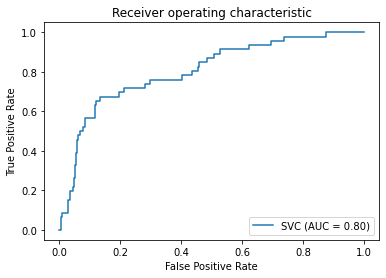

In [90]:
plot_roc_curve(SVC_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Saving the Model

In [91]:
import joblib

In [92]:
joblib.dump(SVC_mod,'WineQuality.pkl')

['WineQuality.pkl']

# Loading the Saved Model

In [93]:
model=joblib.load('WineQuality.pkl')

# Checking if the model is working properly

In [94]:
prediction=model.predict(x_test)

In [96]:
print(accuracy_score(y_test,prediction))

0.8566978193146417


In [97]:
prediction=pd.DataFrame(prediction)

In [98]:
prediction

0
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
10   0
11   0
12   0
13   0
14   0
15   0
16   0
17   0
18   0
19   0
20   0
21   0
22   0
23   0
24   0
25   0
26   0
27   0
28   0
29   0
30   0
31   0
32   0
33   0
34   0
35   0
36   0
37   0
38   0
39   0
40   0
41   0
42   0
43   0
44   0
45   0
46   0
47   0
48   0
49   0
50   0
51   0
52   0
53   0
54   0
55   0
56   0
57   0
58   0
59   0
60   0
61   0
62   0
63   0
64   0
65   0
66   0
67   0
68   0
69   0
70   0
71   0
72   0
73   0
74   0
75   0
76   0
77   0
78   0
79   0
80   0
81   0
82   0
83   0
84   0
85   0
86   0
87   0
88   0
89   0
90   0
91   0
92   0
93   0
94   0
95   0
96   0
97   0
98   0
99   0
100  0
101  0
102  0
103  0
104  0
105  0
106  0
107  0
108  0
109  0
110  0
111  0
112  0
113  0
114  0
115  0
116  0
117  0
118  0
119  0
120  0
121  0
122  0
123  0
124  0
125  0
126  0
127  0
128  0
129  0
130  0
131  0
132  0
133  0
134  0
135  0
136  0
137  0
138  0
139  0
140  0
141  0
142  0
143  0
144  0
145  0
146  0
147  0
148  0
149  0
150  0
151  0
152  0
153  0
154  0
155  0
156  0
157  0
158  0
159  0
160  0
161  0
162  0
163  0
164  0
165  0
166  0
167  0
168  0
169  0
170  0
171  0
172  0
173  0
174  0
175  0
176  0
177  0
178  0
179  0
180  0
181  0
182  0
183  0
184  0
185  0
186  0
187  0
188  0
189  0
190  0
191  0
192  0
193  0
194  0
195  0
196  0
197  0
198  0
199  0
200  0
201  0
202  0
203  0
204  0
205  0
206  0
207  0
208  0
209  0
210  0
211  0
212  0
213  0
214  0
215  0
216  0
217  0
218  0
219  0
220  0
221  0
222  0
223  0
224  0
225  0
226  0
227  0
228  0
229  0
230  0
231  0
232  0
233  0
234  0
235  0
236  0
237  0
238  0
239  0
240  0
241  0
242  0
243  0
244  0
245  0
246  0
247  0
248  0
249  0
250  0
251  0
252  0
253  0
254  0
255  0
256  0
257  0
258  0
259  0
260  0
261  0
262  0
263  0
264  0
265  0
266  0
267  0
268  0
269  0
270  0
271  0
272  0
273  0
274  0
275  0
276  0
277  0
278  0
279  0
280  0
281  0
282  0
283  0
284  0
285  0
286  0
287  0
288  0
289  0
290  0
291  0
292  0
293  0
294  0
295  0
296  0
297  0
298  0
299  0
300  0
301  0
302  0
303  0
304  0
305  0
306  0
307  0
308  0
309  0
310  0
311  0
312  0
313  0
314  0
315  0
316  0
317  0
318  0
319  0
320  0